# Reference Sheet Data Analysis

In [314]:
import pandas as pd
import numpy as np

foi = ['Fiscal Period', 'Fiscal Year', 'Item Category', 'Item Name', 'Units', 'Revenue']
raw_df = pd.read_excel("VW_SALES_DIST_DETAILS.xlsx", usecols=foi)
raw_df.head(5)


Fiscal Period  Fiscal Year         Item Category  \
0                 1.0       2016.0    SYSTEM SUITABILITY   
1                 1.0       2016.0    SYSTEM SUITABILITY   
2                 1.0       2016.0    SYSTEM SUITABILITY   
3                 1.0       2016.0      RESIDUAL SOLVENT   
4                 1.0       2016.0      RESIDUAL SOLVENT   
...               ...          ...                   ...   
117820            9.0       2018.0  AUTHENTIC SUBSTANCES   
117821            9.0       2018.0            IMPURITIES   
117822            9.0       2018.0            IMPURITIES   
117823            9.0       2018.0            IMPURITIES   
117824            9.0       2018.0            IMPURITIES   

                                                Item Name  Units  Revenue  
0                                       1,4-Benzoquinone       4   731.00  
1                                       1,4-Benzoquinone       1   182.75  
2                                       1,4-Benzoquinone       0     0.00  
3                                              1-Butanol       2   365.50  
4                                             2-Propanol       3   548.25  
...                                                   ...    ...      ...  
117820                                 Zinc Sulfate  (AS)      1   195.50  
117821  Ziprasidone Related Compound C  (5,5'-Bis(2-(4...      5  3421.25  
117822  Zoledronic Acid Related Compound A  (2-(1H-Imi...      1   684.25  
117823  Zolmitriptan Related Compound E  ((S)-N,N-dime...      1   620.50  
117824  Zopiclone R-Isomer CIV  ((-)-(5R)-6-(5-Chlorop...      2  1411.00  

[117825 rows x 6 columns]

In [838]:
raw_df = raw_df.query('Units != 0 and Revenue != 0')
raw_df.head(5)

Fiscal Period  Fiscal Year       Item Category         Item Name  Units  \
0            1.0       2016.0  SYSTEM SUITABILITY  1,4-Benzoquinone      4   
1            1.0       2016.0  SYSTEM SUITABILITY  1,4-Benzoquinone      1   
3            1.0       2016.0    RESIDUAL SOLVENT         1-Butanol      2   
4            1.0       2016.0    RESIDUAL SOLVENT        2-Propanol      3   
5            1.0       2016.0    RESIDUAL SOLVENT        2-Propanol      2   

   Revenue  Revenue Per Unit  date_label  
0   731.00            182.75         1.0  
1   182.75            182.75         1.0  
3   365.50            182.75         1.0  
4   548.25            182.75         1.0  
5   365.50            182.75         1.0

In [839]:
for feature in foi:
    print("The number of unique classes in " + feature + " is: " + str(len(pd.unique(raw_df[feature]))))

The number of unique classes in Fiscal Period is: 13
The number of unique classes in Fiscal Year is: 4
The number of unique classes in Item Category is: 13
The number of unique classes in Item Name is: 3096
The number of unique classes in Units is: 164
The number of unique classes in Revenue is: 3884


In [840]:
raw_df['Revenue Per Unit']= raw_df['Revenue'] / raw_df['Units']

In [841]:
import matplotlib.pyplot as plt

item_classes = pd.unique(disp_df['Item Category'])
print(item_classes)
print(len(item_classes))


['SYSTEM SUITABILITY' 'RESIDUAL SOLVENT' 'IMPURITIES' 'EXCIPIENTS'
 'SMALL MOLECULES' 'CALIBRATORS' 'ANTIBIOTICS' 'DIETARY SUPPLEMENTS'
 'BIOTECH' 'AUTHENTIC SUBSTANCES' 'FCC' 'MISCELLANEOUS' 'VET'
 'SMALL MOLECULE']
14


In [842]:
raw_df['Item Category'] = raw_df['Item Category'].replace('SMALL MOLECULE', 'SMALL MOLECULES')

In [843]:
item_classes = pd.unique(raw_df['Item Category'])
print(item_classes)
print(len(item_classes))

['SYSTEM SUITABILITY' 'RESIDUAL SOLVENT' 'IMPURITIES' 'EXCIPIENTS'
 'SMALL MOLECULES' 'CALIBRATORS' 'ANTIBIOTICS' 'DIETARY SUPPLEMENTS'
 'BIOTECH' 'AUTHENTIC SUBSTANCES' 'FCC' 'MISCELLANEOUS' 'VET']
13


## Classifying Sales By 'Item Category'

After classifying sales by 'Item Category', the categories with the highest average revenues, average units sold, and average revenue per unit were identified.  Because several categories were repeated the highest averages lists, those were the initial focus of exploration.

Even though Biotech is a relatively smaller share of the total revenue generated by the company, it has higher average revenues, units sold and revenue per unit when compared to other categories.  Calibrators, Small Molecules, Impurities, and System Suitability were also top earning categories, but this could be expected because they represent a larger portion of total unit sales and revenue for the company.  When exploring the category Biotech specifically, late spring/ early summer and late fall/ early winter months tended to have higher revenues and unit sales when compared to other months.

In [844]:
top_revenue_categories = []
top_units_categories = []
top_rpu_categories = []

for item in item_classes:
    temp_df = raw_df[raw_df["Item Category"] == item]
    #print(item)
    #print(temp_df.describe())
    if temp_df['Revenue'].mean() > 1000:
        top_revenue_categories.append(item)
    if temp_df['Units'].mean() > 2.2:
        top_units_categories.append(item)
    if temp_df['Revenue Per Unit'].mean() > 270:
        top_rpu_categories.append(item)
    #print("\n")
    
print("Top Average Revenue Categories:", top_revenue_categories)
print("Top Average Units Sold Categories:", top_units_categories)
print("Top Revenue Per Unit:", top_rpu_categories)

Top Revenue Categories: ['SYSTEM SUITABILITY', 'IMPURITIES', 'CALIBRATORS', 'BIOTECH']
Top Average Units Sold Categories: ['RESIDUAL SOLVENT', 'SMALL MOLECULES', 'CALIBRATORS', 'BIOTECH']
Top Revenue Per Unit: ['SYSTEM SUITABILITY', 'IMPURITIES', 'SMALL MOLECULES', 'BIOTECH']


In [845]:
raw_df['date_label'] = raw_df['Fiscal Period'] + 12 * (raw_df['Fiscal Year'] - 2016)


In [846]:
def fp_to_month(fp_list):
    month_list = []
    for item in fp_list:
        if item == 1:
            month_list.append("Jul")
        elif item == 2:
            month_list.append("Aug")
        elif item == 3:
            month_list.append("Sep")
        elif item == 4:
            month_list.append("Oct")
        elif item == 5:
            month_list.append("Nov")
        elif item == 6:
            month_list.append("Dec")
        elif item == 7:
            month_list.append("Jan")
        elif item == 8:
            month_list.append("Feb")
        elif item == 9:
            month_list.append("Mar")
        elif item == 10:
            month_list.append("Apr")
        elif item == 11:
            month_list.append("May")
        elif item == 12:
            month_list.append("Jun")
    return month_list


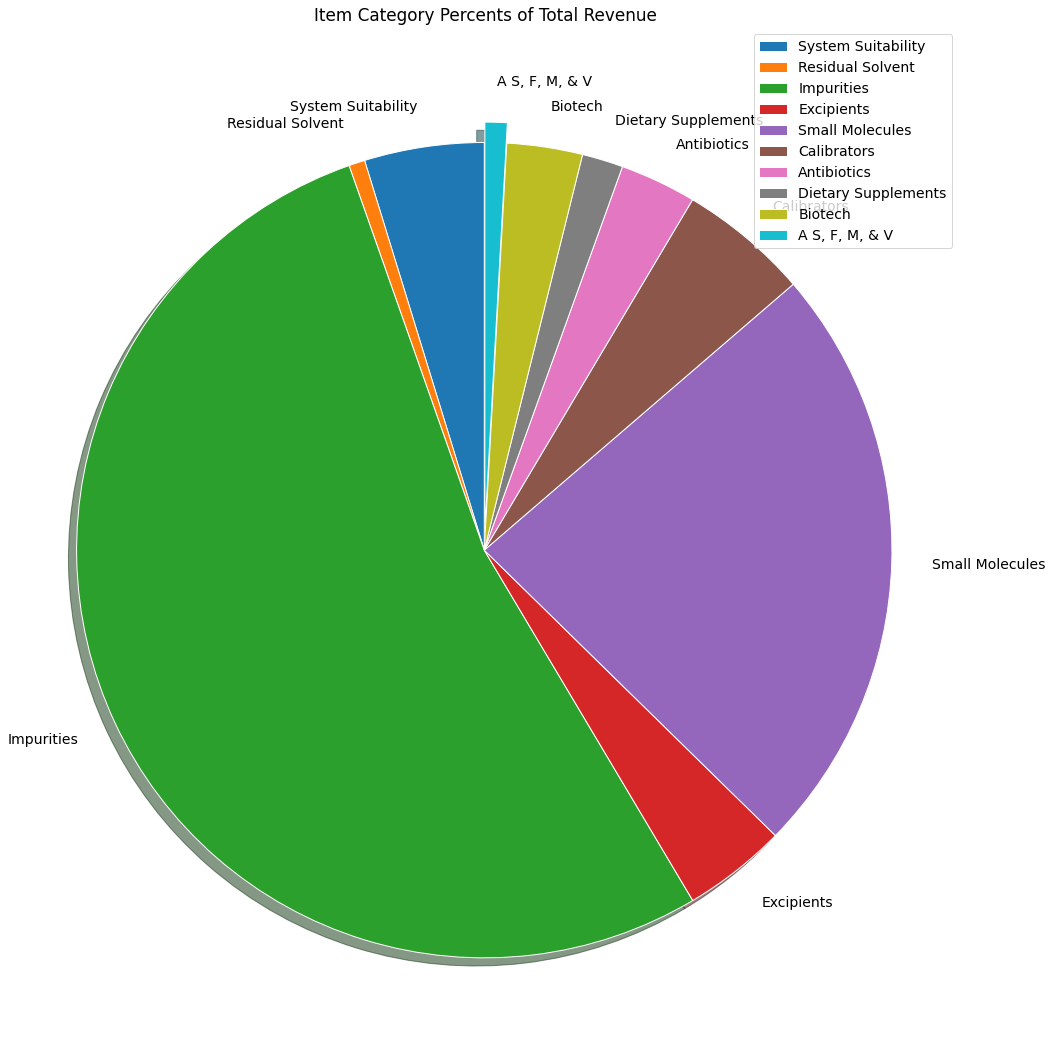

In [325]:
percent_of_total_revenues = []
rev_sum = raw_df['Revenue'].sum()
small_revs_agg_perc = 0

for category in item_classes:
    category_df = raw_df[raw_df['Item Category'] == category]
    if (category != "AUTHENTIC SUBSTANCES") & (category != "FCC") & (category != "MISCELLANEOUS") & (category != "VET"):
        percent_of_total_revenues.append(category_df['Revenue'].sum() / rev_sum)
    else:
        small_revs_agg_perc += category_df['Revenue'].sum() / rev_sum

percent_of_total_revenues.append(small_revs_agg_perc)

item_classes_for_pie_chart = ['SYSTEM SUITABILITY', 'RESIDUAL SOLVENT', 'IMPURITIES', 'EXCIPIENTS',
 'SMALL MOLECULES', 'CALIBRATORS', 'ANTIBIOTICS', 'DIETARY SUPPLEMENTS',
 'BIOTECH', 'A S, F, M, & V']
explode_rat = [0 for x in range(1,10)]
explode_rat.append(0.05)

plt.rc('font', size=14) 
fig, ax = plt.subplots(figsize=(15, 15))
ax.set_title("Item Category Percents of Total Revenue")
ax.pie(percent_of_total_revenues, labels=[item.title() for item in item_classes_for_pie_chart], 
       shadow=True, startangle=90, wedgeprops={'linewidth': 1.0, 'edgecolor': 'white'}, explode=explode_rat)
ax.axis('equal') 
ax.legend()

fig.tight_layout()

plt.show()

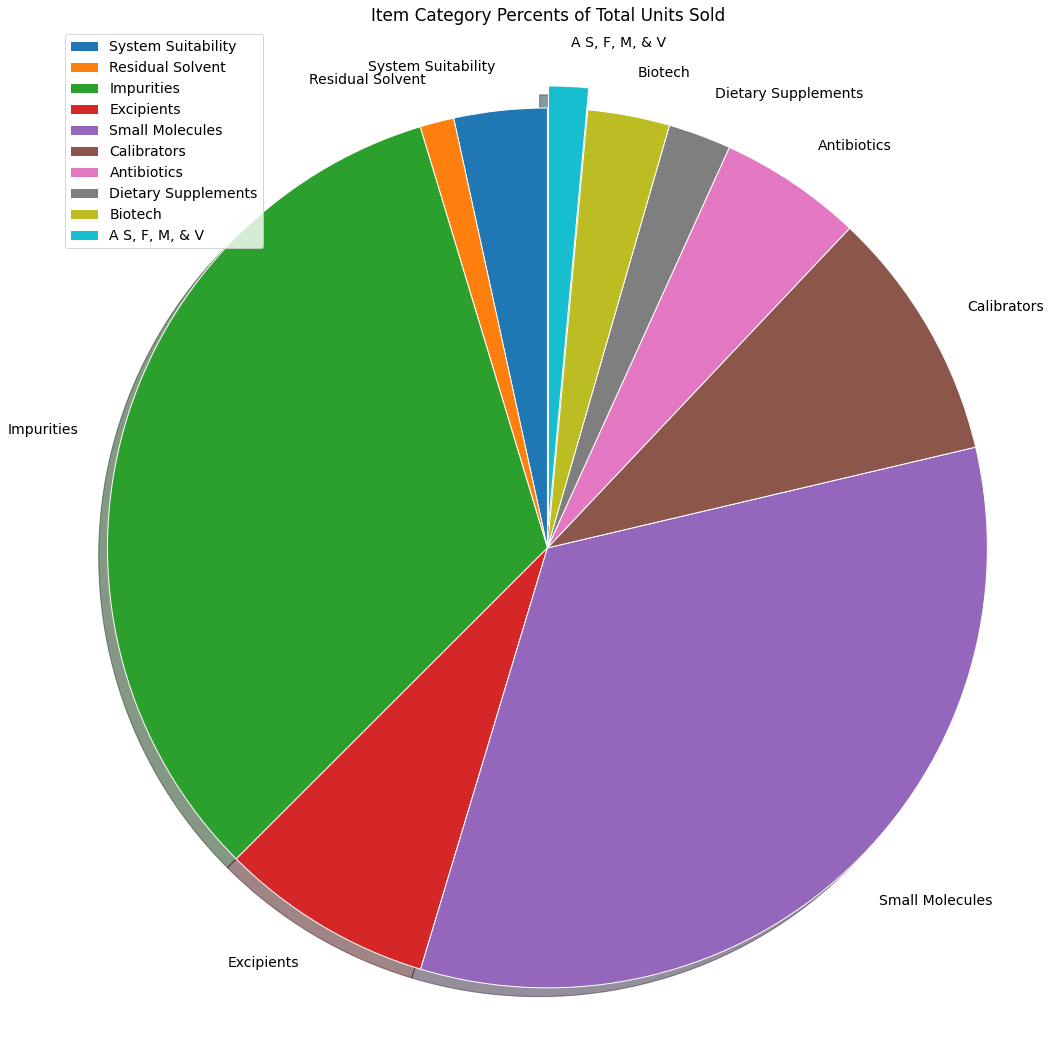

In [326]:
percent_of_total_units = []
units_sum = raw_df['Units'].sum()
small_units_agg_perc = 0

for category in item_classes:
    category_df = raw_df[raw_df['Item Category'] == category]
    if (category != "AUTHENTIC SUBSTANCES") & (category != "FCC") & (category != "MISCELLANEOUS") & (category != "VET"):
        percent_of_total_units.append(category_df['Units'].sum() / units_sum)
    else:
        small_units_agg_perc += category_df['Units'].sum() / units_sum

percent_of_total_units.append(small_units_agg_perc)

item_classes_for_pie_chart = ['SYSTEM SUITABILITY', 'RESIDUAL SOLVENT', 'IMPURITIES', 'EXCIPIENTS',
 'SMALL MOLECULES', 'CALIBRATORS', 'ANTIBIOTICS', 'DIETARY SUPPLEMENTS',
 'BIOTECH', 'A S, F, M, & V']
explode_rat = [0 for x in range(1,10)]
explode_rat.append(0.05)

plt.rc('font', size=14) 
fig, ax = plt.subplots(figsize=(15, 15))
ax.set_title("Item Category Percents of Total Units Sold")
ax.pie(percent_of_total_units, labels=[item.title() for item in item_classes_for_pie_chart], 
       shadow=True, startangle=90, wedgeprops={'linewidth': 1.0, 'edgecolor': 'white'}, explode=explode_rat)
ax.axis('equal') 
ax.legend()

fig.tight_layout()

plt.show()

In [835]:
best_fp_BIOTECH_units = []
best_fp_BIOTECH_revenue = []
best_fp_BIOTECH_rpu = []

for x in range(1,13):
    temp_desc = biotech_df[biotech_df['Fiscal Period'] == x].describe()
    if temp_desc['Units'][1] > 5.6:
        best_fp_BIOTECH_units.append(x)
    if temp_desc['Revenue'][1] > 2000:
        best_fp_BIOTECH_revenue.append(x)
    if temp_desc['Revenue Per Unit'][1] > 415:
        best_fp_BIOTECH_rpu.append(x)
    
print("Best months for Biotech Average Units Sold " + str(fp_to_month(best_fp_BIOTECH_units)))
print("Best months for Biotech Revenue " + str(fp_to_month(best_fp_BIOTECH_revenue)))
print("Best months for Biotech Revenue Per Unit " + str(fp_to_month(best_fp_BIOTECH_rpu)))

Best months for Biotech Average Units Sold ['Oct', 'Nov', 'May', 'Jun']
Best months for Biotech Revenue ['Oct', 'Nov', 'Mar', 'May', 'Jun']
Best months for Biotech Revenue Per Unit ['Jul', 'Nov', 'Mar', 'May']


## Classifying Sales by 'Item Category' Cont.

Plotting the revenues over time as a scatter plot highlighted two main trends.  Sales that are outliers tend to produce positive revenue in the top selling categories, and this makes sense.  Additionally, the range of sale revenues and units solds tends to significantly vary every one to two months.

To create a more explicit visual for each category, bar graphs displaying the mean, median, and variance for each month (fiscal period) were generated for units sold, revenue and revenue per unit respectively.  From the units sold graphs, the change in quantities of sales from month to month can be seen.  Dietary Supplements and Antibotics category sales stood appart from the sale in other categories because the respective medians were consistent from the beginning of fiscal year 2016 until nearly the end of fiscal year 2018.  From the revenue graphs, the median and average revenue tend to change pretty dramatically over the duration of even 12 months.  In contrast, the Impurities, Small Molecules and Excipient categories have median monthly revenues that are more consistent over time.  From the revenue per unit graphs, the overall trend of a wider range of values for the median, mean and variance from month to month for the majority categories continues.  Sales in the Impurities category differ in trend when compared to other categories because the revenue per unit for these types of ites has steadily increased since fiscal year 2016.

In [335]:
categories_oi = ['SYSTEM SUITABILITY', 'IMPURITIES', 'CALIBRATORS', 'BIOTECH', 'SMALL MOLECULES', 'EXCIPIENTS']

num_of_fp = 33
fp_counter = 1
fiscal_mo_yr_labels = []
for yr in ['16', '17', '18']:
    for mo in [str(x) for x in range(1,13)]:
        if fp_counter <= num_of_fp:
            fiscal_mo_yr_labels.append(mo + " - '" + yr)
            fp_counter += 1

f_periods = [x for x in range(1,34)]
#print(f_periods)


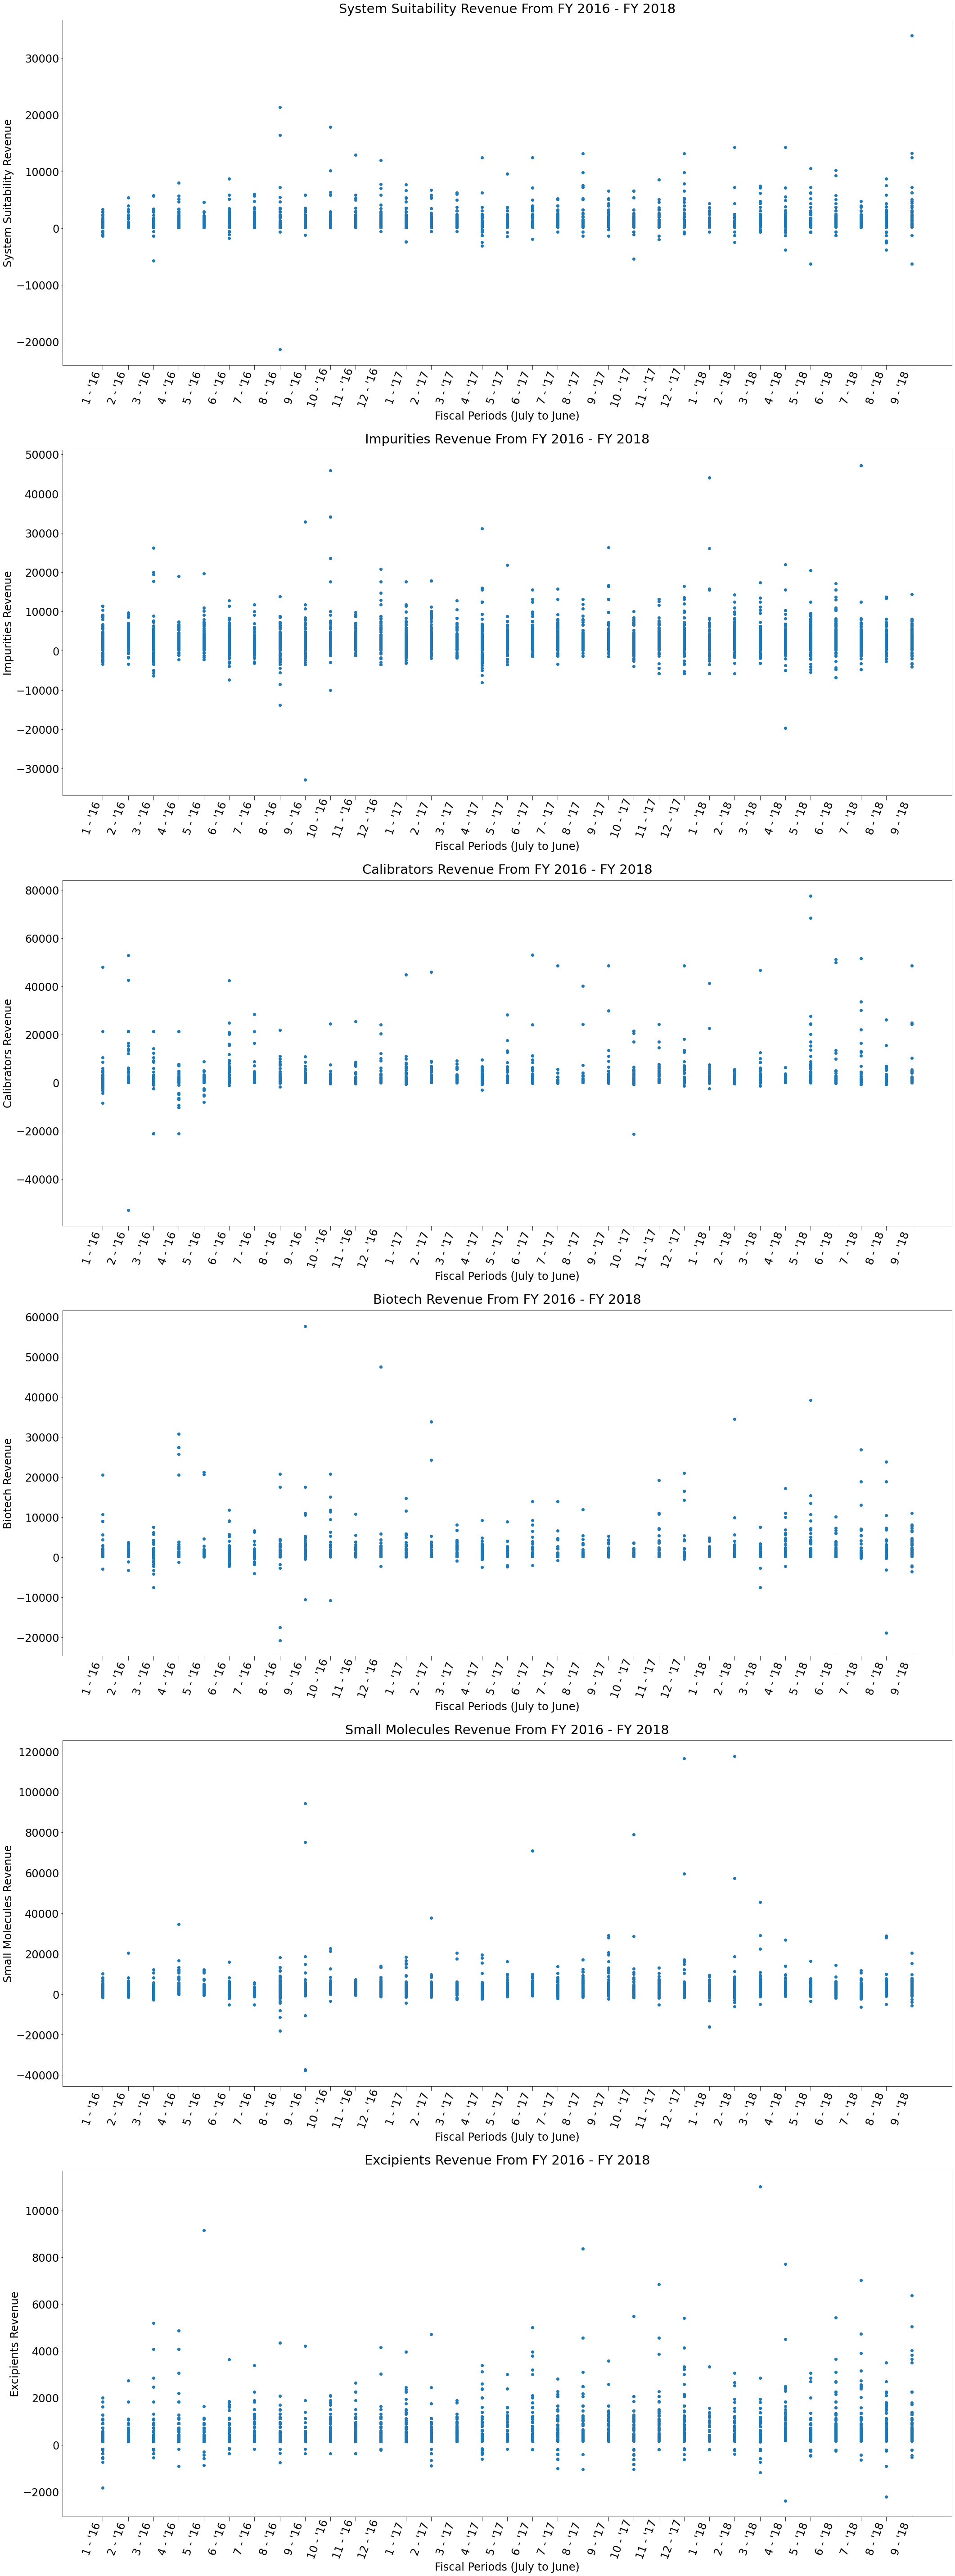

In [348]:
fig, ax = plt.subplots(6, figsize=(30, 80))

font = {
    'horizontalalignment':'right',
    'verticalalignment':'center',
    'rotation':'70'
}

for category in categories_oi:
    category_df = raw_df[raw_df['Item Category'] == category]
    
    ax[categories_oi.index(category)].scatter(x = category_df['date_label'], y =category_df['Revenue'])
    ax[categories_oi.index(category)].set_xticks(f_periods)
    ax[categories_oi.index(category)].set_xticklabels(fiscal_mo_yr_labels, fontdict= font)
    ax[categories_oi.index(category)].tick_params(axis='x', which='major', pad=40, length=10)
    ax[categories_oi.index(category)].set_xlabel("Fiscal Periods (July to June)")
    ax[categories_oi.index(category)].set_ylabel("{var_name} Revenue".format(var_name=category.title())) 
    ax[categories_oi.index(category)].set_title("{var_name} Revenue From FY 2016 - FY 2018".format(var_name=category.title()), pad=15)
    plt.rc('font', size=24) 
    fig.tight_layout()
    
plt.show()

In [834]:
item_classes = ['SYSTEM SUITABILITY', 'RESIDUAL SOLVENT', 'IMPURITIES',
       'EXCIPIENTS', 'SMALL MOLECULES', 'CALIBRATORS', 'ANTIBIOTICS',
       'DIETARY SUPPLEMENTS', 'BIOTECH', 'AUTHENTIC SUBSTANCES',
       'MISCELLANEOUS', 'VET']

#print(raw_df["Item Category"].unique())

In [373]:
import statistics

fig, ax = plt.subplots(12, figsize=(60, 170))
width = 0.25
x = np.arange(1,len(f_periods)+1)

for category in item_classes:
    category_df = raw_df[raw_df['Item Category'] == category]

    fp_means = []
    fp_medians = []
    fp_variances = []

    for fp in range(1,34):
        fp_df = category_df[category_df['date_label'] == fp]

        fp_medians.append(fp_df['Units'].median())
        fp_means.append(fp_df['Units'].mean())
        fp_variances.append(statistics.variance(fp_df['Units'])/70)

    rects1 = ax[item_classes.index(category)].bar(x + width, fp_medians, width, label='Median')
    rects2 = ax[item_classes.index(category)].bar(x, fp_means, width, label='Mean')
    rects3 = ax[item_classes.index(category)].bar(x - width, fp_variances, width, label='Variance (scaled down)') 

    plt.rc('font', size=58)
    ax[item_classes.index(category)].set_xticks(f_periods)
    ax[item_classes.index(category)].set_xticklabels(fiscal_mo_yr_labels, fontdict= font)
    ax[item_classes.index(category)].tick_params(axis='x', which='major', pad=95, length=10)
    ax[item_classes.index(category)].set_xlabel("Fiscal Periods (July to June)")
    ax[item_classes.index(category)].set_ylabel("{var_name} Units Sold".format(var_name=category.title())) 
    ax[item_classes.index(category)].set_title("{var_name} Units Sold From FY 2016 - FY 2018".format(var_name=category.title()), pad=15)
    ax[item_classes.index(category)].legend()
     
    fig.tight_layout()
    
plt.show()

In [372]:
fig_r, ax_r = plt.subplots(12, figsize=(60, 170))
width = 0.25
x = np.arange(1,len(f_periods)+1)

for category in item_classes:
    category_df = raw_df[raw_df['Item Category'] == category]

    fp_means = []
    fp_medians = []
    fp_variances = []

    for fp in range(1,34):
        fp_df = category_df[category_df['date_label'] == fp]

        fp_medians.append(fp_df['Revenue'].median())
        fp_means.append(fp_df['Revenue'].mean())
        fp_variances.append(statistics.variance(fp_df['Revenue'])/40000)

    rects1 = ax_r[item_classes.index(category)].bar(x + width, fp_medians, width, label='Median')
    rects2 = ax_r[item_classes.index(category)].bar(x, fp_means, width, label='Mean')
    rects3 = ax_r[item_classes.index(category)].bar(x - width, fp_variances, width, label='Variance (scaled down)') 

    plt.rc('font', size=58)
    ax_r[item_classes.index(category)].set_xticks(f_periods)
    ax_r[item_classes.index(category)].set_xticklabels(fiscal_mo_yr_labels, fontdict= font)
    ax_r[item_classes.index(category)].tick_params(axis='x', which='major', pad=95, length=10)
    ax_r[item_classes.index(category)].set_xlabel("Fiscal Periods (July to June)")
    ax_r[item_classes.index(category)].set_ylabel("{var_name} Revenue".format(var_name=category.title())) 
    ax_r[item_classes.index(category)].set_title("{var_name} Revenue From FY 2016 - FY 2018".format(var_name=category.title()), pad=15)
    ax_r[item_classes.index(category)].legend()
     
    fig_r.tight_layout()
    
plt.show()

In [833]:
fig_r, ax_r = plt.subplots(12, figsize=(60, 170))
width = 0.25
x = np.arange(1,len(f_periods)+1)

for category in item_classes:
    category_df = raw_df[raw_df['Item Category'] == category]

    fp_means = []
    fp_medians = []
    fp_variances = []

    for fp in range(1,34):
        fp_df = category_df[category_df['date_label'] == fp]

        fp_medians.append(fp_df['Revenue Per Unit'].median())
        fp_means.append(fp_df['Revenue Per Unit'].mean())
        fp_variances.append(statistics.variance(fp_df['Revenue Per Unit'])/80)

    rects1 = ax_r[item_classes.index(category)].bar(x + width, fp_medians, width, label='Median')
    rects2 = ax_r[item_classes.index(category)].bar(x, fp_means, width, label='Mean')
    rects3 = ax_r[item_classes.index(category)].bar(x - width, fp_variances, width, label='Variance (scaled down)') 

    plt.rc('font', size=54)
    ax_r[item_classes.index(category)].set_xticks(f_periods)
    ax_r[item_classes.index(category)].set_xticklabels(fiscal_mo_yr_labels, fontdict= font)
    ax_r[item_classes.index(category)].tick_params(axis='x', which='major', pad=95, length=10)
    ax_r[item_classes.index(category)].set_xlabel("Fiscal Periods (July to June)")
    ax_r[item_classes.index(category)].set_ylabel("{var_name} Revenue Per Unit".format(var_name=category.title())) 
    ax_r[item_classes.index(category)].set_title("{var_name} Revenue Per Unit From FY 2016 - FY 2018".format(var_name=category.title()), pad=15)
    ax_r[item_classes.index(category)].legend()
     
    fig_r.tight_layout()
    
plt.show()

# Relationships Between RS Sales (Small Molecule) and Drug Applications



In [812]:
sm_df = raw_df[raw_df['Item Category'] == "SMALL MOLECULES"]
sm_df.shape

(36299, 8)

In [813]:
raw_df['Item Name'] = [str(name).title().strip() for name in raw_df['Item Name']]

/var/folders/j9/ysjy31n16hzdqp8hpdl_lj4w0000gn/T/ipykernel_55464/3551785510.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  raw_df['Item Name'] = [str(name).title().strip() for name in raw_df['Item Name']]


In [814]:
sm_df.head(5)

Fiscal Period  Fiscal Year    Item Category           Item Name  Units  \
13            1.0       2016.0  SMALL MOLECULES       Acetaminophen      2   
21            1.0       2016.0  SMALL MOLECULES           Acyclovir      3   
29            1.0       2016.0  SMALL MOLECULES             Alcohol      3   
30            1.0       2016.0  SMALL MOLECULES             Alcohol      1   
31            1.0       2016.0  SMALL MOLECULES  Alendronate Sodium      2   

    Revenue  Revenue Per Unit  date_label  
13   365.50            182.75         1.0  
21   693.60            231.20         1.0  
29   548.25            182.75         1.0  
30   182.75            182.75         1.0  
31   365.50            182.75         1.0

In [815]:
total_sm_items = len(sm_df['Item Name'].unique())
print("Total Number of Small Molecules Items:", total_sm_items)

Total Number of Small Molecules Items: 939


In [816]:
sm_item_names = (sm_df['Item Name'].unique())
sm_item_names_cleaned = [str(name).title().strip() for name in item_names]
sm_item_names_cleaned.sort()
#sm_item_names_cleaned


In [817]:
sm_df = raw_df[raw_df['Item Category'] == "SMALL MOLECULES"]
sm_grouped_df = sm_df.groupby('Item Name')

# for name, name_df in sm_grouped_df:
#     print(str(name))
#     print(name_df.shape)


In [818]:
products_df = pd.read_csv('products.txt', delimiter = "~")
products_df.head(5)


Ingredient               DF;Route              Trade_Name  \
0                 BUDESONIDE   AEROSOL, FOAM;RECTAL                  UCERIS   
1  MINOCYCLINE HYDROCHLORIDE  AEROSOL, FOAM;TOPICAL                  AMZEEQ   
2               AZELAIC ACID  AEROSOL, FOAM;TOPICAL            AZELAIC ACID   
3     BETAMETHASONE VALERATE  AEROSOL, FOAM;TOPICAL  BETAMETHASONE VALERATE   
4     BETAMETHASONE VALERATE  AEROSOL, FOAM;TOPICAL  BETAMETHASONE VALERATE   

         Applicant       Strength Appl_Type  Appl_No  Product_No TE_Code  \
0            SALIX  2MG/ACTUATION         N   205613           1     NaN   
1             VYNE     EQ 4% BASE         N   212379           1     NaN   
2  TEVA PHARMS USA            15%         A   210928           1     NaN   
3   PADAGIS ISRAEL          0.12%         A    78337           1      AB   
4  RICONPHARMA LLC          0.12%         A   207144           1     NaN   

  Approval_Date  RLD   RS   Type                 Applicant_Full_Name  
0   Oct 7, 2014  Yes  Yes     RX           SALIX PHARMACEUTICALS INC  
1  Oct 18, 2019  Yes  Yes     RX            VYNE PHARMACEUTICALS INC  
2   Oct 7, 2020   No   No  DISCN        TEVA PHARMACEUTICALS USA INC  
3  Nov 26, 2012   No   No     RX  PADAGIS ISRAEL PHARMACEUTICALS LTD  
4  May 24, 2017   No   No  DISCN                     RICONPHARMA LLC

In [819]:
len(products_df['Trade_Name'].unique())

7037

In [820]:
product_txt_names = products_df['Trade_Name'].unique()
product_txt_names_cleaned = [str(name).title() for name in product_txt_names]
    
product_txt_names_cleaned.sort()
#product_txt_names_cleaned

## Matched Items - 61%

In [821]:
import math

a_set = set(sm_item_names_cleaned)
b_set = set(product_txt_names_cleaned)
numb_of_sm_matches = len(a_set.intersection(b_set))

item_names_oi = list(a_set.intersection(b_set))
#print(item_names_oi)

print("Percent Of Small Molecules Items Matched To Orange Book: {}%".format(str(math.floor(100 * numb_of_sm_matches / total_sm_items))))
print("Total Number Of Small Molecules Items Matched To Orange Book:", numb_of_sm_matches)

Percent Of Small Molecules Items Matched To Orange Book: 61%
Total Number Of Small Molecules Items Matched To Orange Book: 577


In [822]:
ingredients_oi = []
num_of_appl = []

agg_df = pd.DataFrame()
agg_df['Item Name'] = item_names_oi

products_df['Trade_Name'] = [name.title() for name in products_df['Trade_Name'].values]

for name in list(item_names_oi):
    new_index = products_df['Trade_Name'] == name
    num_of_appl.append(len(products_df.loc[new_index]['Applicant'].values))
    ingredients_oi.append(str(products_df.loc[new_index]['Applicant'].values).title())   

agg_df['Applicants'] = [name.title().strip() for name in ingredients_oi]
agg_df['Number Of Applicants'] = num_of_appl

agg_df.head(5)
 

Item Name                                         Applicants  \
0                 Desonide  ['Cadila' 'Cosette' 'Glenmark Pharms' 'Padagis...   
1              Tigecycline  ['Accord Hlthcare Inc' 'Amneal' 'Apotex' 'Eugi...   
2  Midodrine Hydrochloride  ['Alembic Pharms Ltd' 'Alembic Pharms Ltd' 'Al...   
3             Prednisolone  ['Akorn' 'Chartwell Rx' 'Ivax Sub Teva Pharms'...   
4            Sulfasalazine  ['Nuvo Pharms Inc' 'Watson Labs' 'Chartwell' '...   

   Number Of Applicants  
0                    19  
1                     8  
2                    33  
3                    50  
4                    10

In [823]:
products_df['Appl_Type'] = [name.title() for name in products_df['Appl_Type'].values]
products_grouped_df = products_df.groupby('Trade_Name')

anda_num_list = []
nda_num_list = []
for name in list(item_names_oi):
    name_df = products_grouped_df.get_group(name)
    anda_num_list.append(list(name_df['Appl_Type']).count('A'))
    nda_num_list.append(list(name_df['Appl_Type']).count('N'))
agg_df['Total Abbreviated NDA Apps'] = anda_num_list
agg_df['Total Traditional NDA Apps'] = nda_num_list
agg_df['Percent of ANDA Apps'] = agg_df['Total Abbreviated NDA Apps'] / (agg_df['Total Abbreviated NDA Apps'] + agg_df['Total Traditional NDA Apps'])

agg_df.head(5)

Item Name                                         Applicants  \
0                 Desonide  ['Cadila' 'Cosette' 'Glenmark Pharms' 'Padagis...   
1              Tigecycline  ['Accord Hlthcare Inc' 'Amneal' 'Apotex' 'Eugi...   
2  Midodrine Hydrochloride  ['Alembic Pharms Ltd' 'Alembic Pharms Ltd' 'Al...   
3             Prednisolone  ['Akorn' 'Chartwell Rx' 'Ivax Sub Teva Pharms'...   
4            Sulfasalazine  ['Nuvo Pharms Inc' 'Watson Labs' 'Chartwell' '...   

   Number Of Applicants  Total Abbreviated NDA Apps  \
0                    19                          17   
1                     8                           5   
2                    33                          33   
3                    50                          50   
4                    10                          10   

   Total Traditional NDA Apps  Percent of ANDA Apps  
0                           2              0.894737  
1                           3              0.625000  
2                           0              1.000000  
3                           0              1.000000  
4                           0              1.000000

In [824]:
units_sold_list = []
avg_revenue_per_unit_list = []
med_revenue_per_unit_list = []
total_revenue_list = []
variance_in_units_sold_list = []
variance_in_revenue_pu_list = []

for name in list(item_names_oi):
    name_df = sm_grouped_df.get_group(name)
    units_sold_list.append(name_df['Units'].sum())
    avg_revenue_per_unit_list.append(name_df['Revenue Per Unit'].mean())
    med_revenue_per_unit_list.append(name_df['Revenue Per Unit'].median())
    total_revenue_list.append(name_df['Revenue'].sum())
    variance_in_units_sold_list.append(name_df['Units'].var())
    variance_in_revenue_pu_list.append(name_df['Revenue Per Unit'].var())
    
agg_df['Total Units Sold'] = units_sold_list
agg_df['Variance In Units Sold'] = variance_in_units_sold_list
agg_df['Avg Revenue Per Unit'] = avg_revenue_per_unit_list
agg_df['Median Revenue Per Unit'] = med_revenue_per_unit_list
agg_df['Variance In Revenue Per Unit'] = variance_in_revenue_pu_list
agg_df['Total Revenue'] = total_revenue_list

agg_df.head(5)

Item Name                                         Applicants  \
0                 Desonide  ['Cadila' 'Cosette' 'Glenmark Pharms' 'Padagis...   
1              Tigecycline  ['Accord Hlthcare Inc' 'Amneal' 'Apotex' 'Eugi...   
2  Midodrine Hydrochloride  ['Alembic Pharms Ltd' 'Alembic Pharms Ltd' 'Al...   
3             Prednisolone  ['Akorn' 'Chartwell Rx' 'Ivax Sub Teva Pharms'...   
4            Sulfasalazine  ['Nuvo Pharms Inc' 'Watson Labs' 'Chartwell' '...   

   Number Of Applicants  Total Abbreviated NDA Apps  \
0                    19                          17   
1                     8                           5   
2                    33                          33   
3                    50                          50   
4                    10                          10   

   Total Traditional NDA Apps  Percent of ANDA Apps  Total Units Sold  \
0                           2              0.894737                77   
1                           3              0.625000               162   
2                           0              1.000000                81   
3                           0              1.000000               108   
4                           0              1.000000                31   

   Variance In Units Sold  Avg Revenue Per Unit  Median Revenue Per Unit  \
0               22.791398            699.764516                    697.0   
1               10.339503            368.333871                    374.0   
2                1.666223            194.793750                    195.5   
3                2.036874            196.541912                    195.5   
4                2.529412            159.208824                    158.4   

   Variance In Revenue Per Unit  Total Revenue  
0                   1455.260532       53712.85  
1                    253.312441       59858.40  
2                     80.583152       15802.55  
3                    121.998478       21255.45  
4                    122.125699        4983.45

## ANDA vs NDA Applications

The overwhelming majority of Small Molecules items sold had nearly all Abbreviated NDA (ANDA) applications.  As seen in the chart below, more than 87% of the items sold had ANDA applications submitted at least 95% of the time.


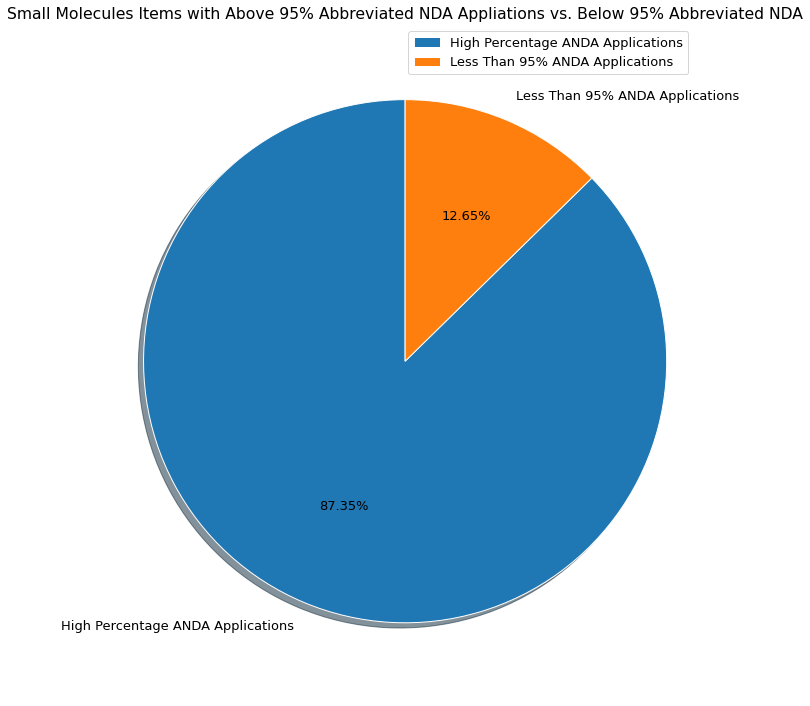

In [825]:
high_perc_anda_list = agg_df[agg_df['Percent of ANDA Apps'] > 0.95]
numb_anda = len(high_perc_anda_list)
numb_nda = (577 - numb_anda)
app_types = [numb_anda, numb_nda]

plt.rc('font', size=13) 
fig, ax = plt.subplots(figsize=(10, 10))
ax.set_title("Small Molecules Items with Above 95% Abbreviated NDA Appliations vs. Below 95% Abbreviated NDA")
ax.pie(app_types, labels=["High Percentage ANDA Applications", "Less Than 95% ANDA Applications"], 
       shadow=True, startangle=90, wedgeprops={'linewidth': 1.0, 'edgecolor': 'white'}, explode=None, autopct='%.2f%%')
ax.axis('equal') 
ax.legend()

fig.tight_layout()

plt.show()

## Number of Applicants vs. Total Revenue

Based on the matched Small Molecules sales data, there exists a weaker to moderate positive correlation between the number of applications submitted for the respective items and the total revenue they generated for the company.  This means as the number of applications increases, so does the total revenue.  Perhaps this suggests when there is widespread demand for an item (indicated by more applications in the US), there is a decent likelihood that the same item will be successful in the sales markets of India.

Correlation: 0.38854556396046935


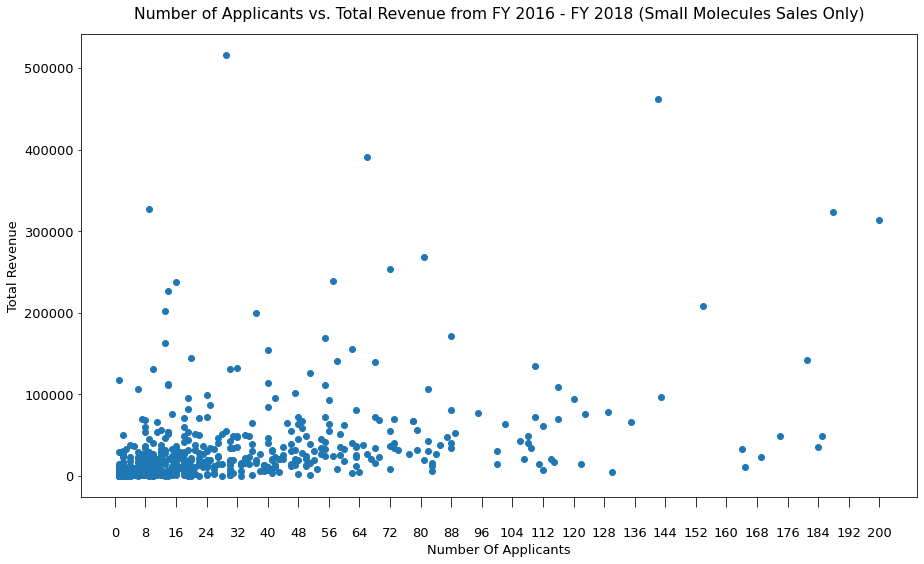

In [826]:
correlation = agg_df['Number Of Applicants'].corr(agg_df['Total Revenue'])
print("Correlation:", correlation)

fig, ax = plt.subplots(figsize=(13, 8))

x_tick_loc = [8*x for x in range(0,26)]
    
ax.scatter(x = agg_df['Number Of Applicants'], y = agg_df['Total Revenue'])
ax.set_xticks(x_tick_loc)
ax.tick_params(axis='x', which='major', pad=20, length=10)
ax.set_xlabel("Number Of Applicants")
ax.set_ylabel("Total Revenue") 
ax.set_title("Number of Applicants vs. Total Revenue from FY 2016 - FY 2018 (Small Molecules Sales Only)", pad=15)
plt.rc('font', size=12) 
fig.tight_layout()
    
plt.show()

## Number of Applicants vs. Total Units Sold

Based on the matched Small Molecules sales data, there exists a moderate positive correlation between the number of applications submitted for the respective items and the total units sold the company.  This means as the number of applications increases, so does the total units sold.  This correlation more strongly suggests that when there is widespread demand for an item (indicated by more applications in the US), there is a likelihood that the same item will be successful in the sales markets of India.

Correlation: 0.5211550231779843


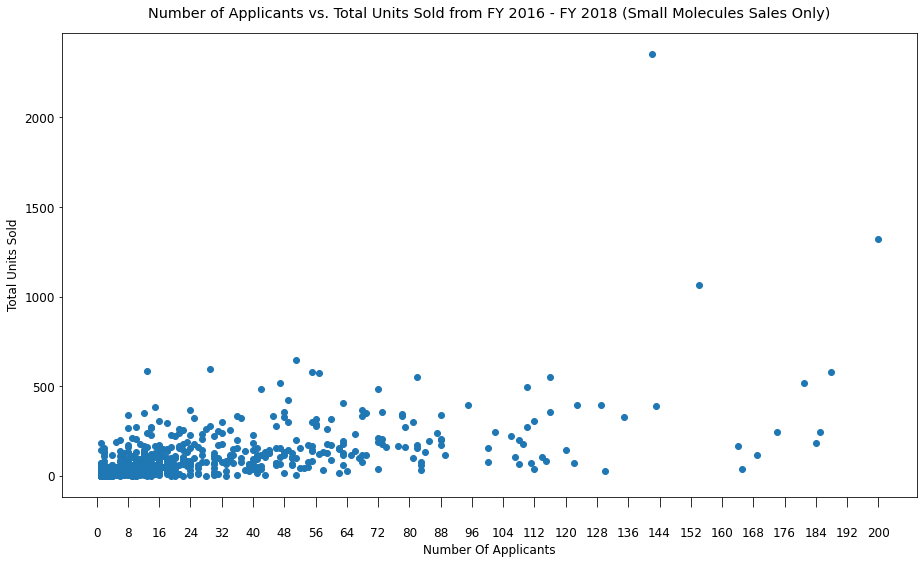

In [827]:
correlation = agg_df['Number Of Applicants'].corr(agg_df['Total Units Sold'])
print("Correlation:", correlation)

fig, ax = plt.subplots(figsize=(13, 8))

# print(agg_df['Number Of Applicants'].min())
# print(agg_df['Number Of Applicants'].max())
x_tick_loc = [8*x for x in range(0,26)]
    
ax.scatter(x = agg_df['Number Of Applicants'], y = agg_df['Total Units Sold'])
ax.set_xticks(x_tick_loc)
#ax.set_xticklabels(fontdict= font)
ax.tick_params(axis='x', which='major', pad=20, length=10)
ax.set_xlabel("Number Of Applicants")
ax.set_ylabel("Total Units Sold") 
ax.set_title("Number of Applicants vs. Total Units Sold from FY 2016 - FY 2018 (Small Molecules Sales Only)", pad=15)
plt.rc('font', size=12) 
fig.tight_layout()
    
plt.show()

## Percent of ANDA Applications vs. Total Units Sold and Total Revenue

Based on the matched Small Molecules sales data, there is no correlation between the percent of ANDA applications submitted for an item and its sales performance in India.  Items that received a high percentage of ANDA applications are just as likely to sell in volume and/ or produce large revenues as items that had a low percentage of ANDA applications.  Is this because ANDA applications had become more popular in the US from fiscal year 2016 to fiscal year 2018, at least in Small Molecules sales?  To begin to answer this question, I would have liked to explore the percentage of Small Molecules sales with high ANDA application rates over time.

Correlation: 0.056743187734733594


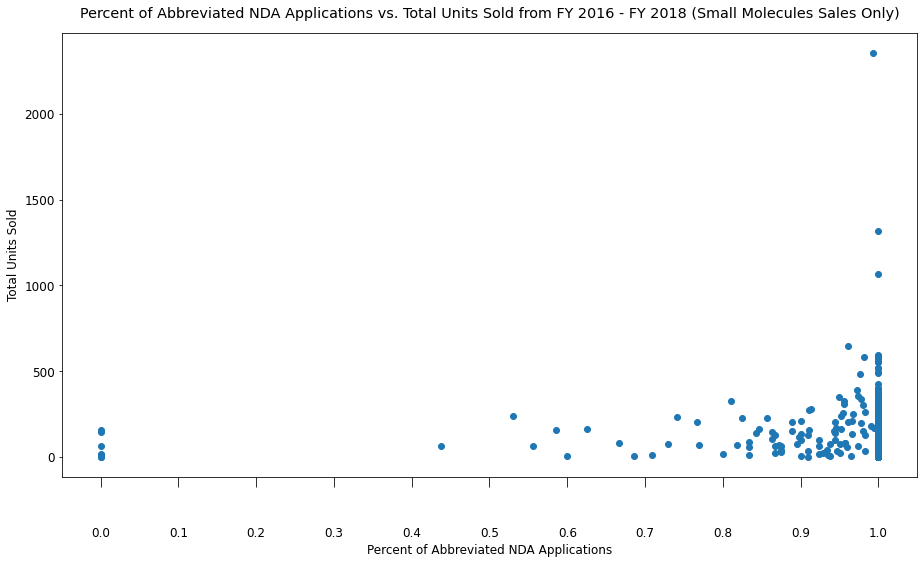

In [828]:
correlation = agg_df['Percent of ANDA Apps'].corr(agg_df['Total Units Sold'])
print("Correlation:", correlation)

fig, ax = plt.subplots(figsize=(13, 8))

x_tick_loc = [x/10 for x in range(0,11)]
    
ax.scatter(x = agg_df['Percent of ANDA Apps'], y = agg_df['Total Units Sold'])
ax.set_xticks(x_tick_loc)
ax.tick_params(axis='x', which='major', pad=40, length=10)
ax.set_xlabel("Percent of Abbreviated NDA Applications")
ax.set_ylabel("Total Units Sold") 
ax.set_title("Percent of Abbreviated NDA Applications vs. Total Units Sold from FY 2016 - FY 2018 (Small Molecules Sales Only)", pad=15)
plt.rc('font', size=12) 
fig.tight_layout()
    
plt.show()

Correlation: 0.028567884497059298


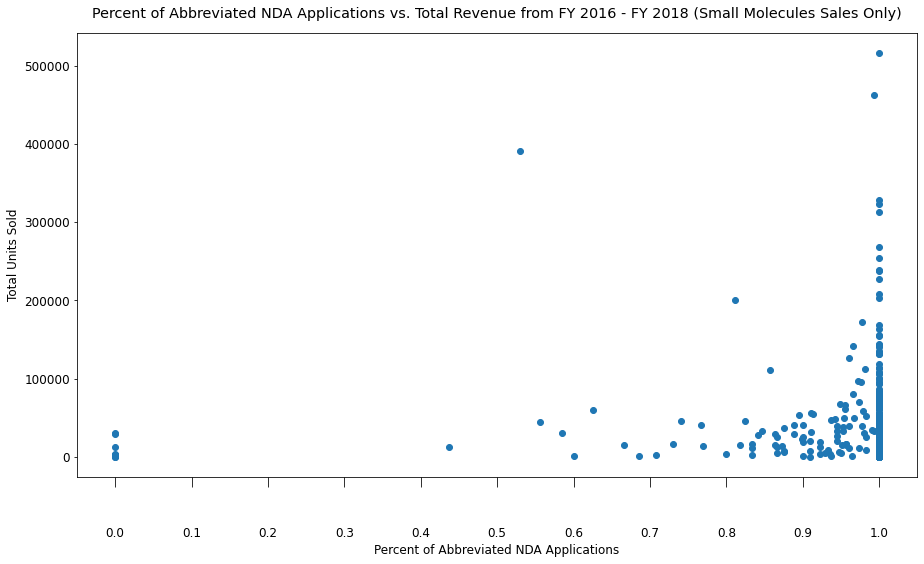

In [829]:
correlation = agg_df['Percent of ANDA Apps'].corr(agg_df['Total Revenue'])
print("Correlation:", correlation)

fig, ax = plt.subplots(figsize=(13, 8))

x_tick_loc = [x/10 for x in range(0,11)]
    
ax.scatter(x = agg_df['Percent of ANDA Apps'], y = agg_df['Total Revenue'])
ax.set_xticks(x_tick_loc)
ax.tick_params(axis='x', which='major', pad=40, length=10)
ax.set_xlabel("Percent of Abbreviated NDA Applications")
ax.set_ylabel("Total Units Sold") 
ax.set_title("Percent of Abbreviated NDA Applications vs. Total Revenue from FY 2016 - FY 2018 (Small Molecules Sales Only)", pad=15)
plt.rc('font', size=12) 
fig.tight_layout()
    
plt.show()

## Number of Applicants vs. Variance In Revenue Per Unit

Revenue per unit is a metric used to compare revenues between items that were sold in different quantities and/ or at different prices.  The variance in the revenue per unit reveals how similar or dissimilar the revenues per unit were based on the individual sales from FY 2016 through FY 2018.  Greater variance means there was a wider range of prices the items were sold at.  Based on the matched Small Molecules sales data, there is no correlation between the number of application submissions received for items and the variance in revenue per unit.  This means items that recieved many applications are no more likely to be sold at a wider range of price points than items that did not recieve many applications.

Correlation: -0.021749760524960162


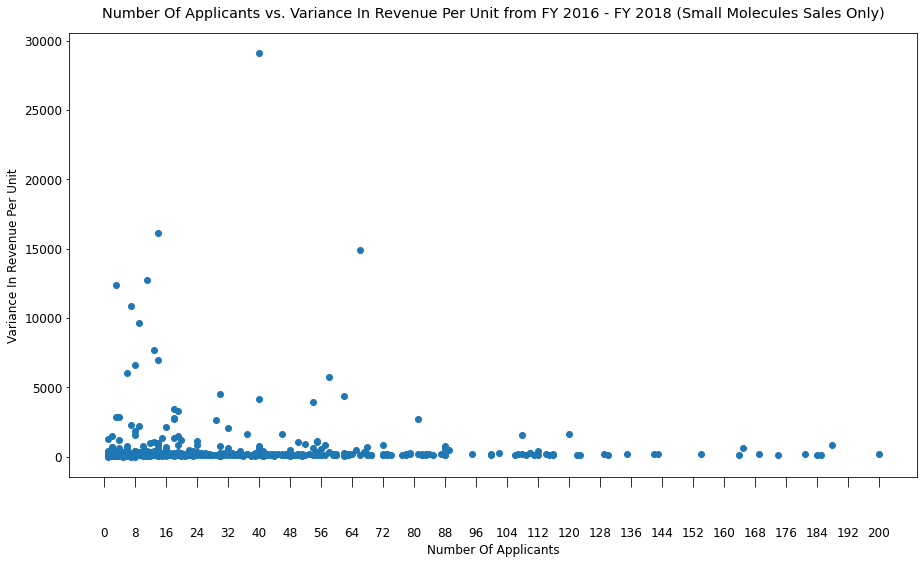

In [830]:
correlation = agg_df['Number Of Applicants'].corr(agg_df['Variance In Revenue Per Unit'])
print("Correlation:", correlation)

fig, ax = plt.subplots(figsize=(13, 8))

x_tick_loc = [8*x for x in range(0,26)]
    
ax.scatter(x = agg_df['Number Of Applicants'], y = agg_df['Variance In Revenue Per Unit'])
ax.set_xticks(x_tick_loc)
ax.tick_params(axis='x', which='major', pad=40, length=10)
ax.set_xlabel("Number Of Applicants")
ax.set_ylabel("Variance In Revenue Per Unit") 
ax.set_title("Number Of Applicants vs. Variance In Revenue Per Unit from FY 2016 - FY 2018 (Small Molecules Sales Only)", pad=15)
plt.rc('font', size=12) 
fig.tight_layout()
    
plt.show()

## Number of Applications vs. Variance In Units Sold

Based on the matched Small Molecules sales data, there is a weaker positive correlation between the number of applications an item received and the variance in the units sold.  This means as the number of applications submitted increases for an item, there is some likelihood that the time will be sold at wider range of quantities.  Considering the moderate positive correlation between the number of applications and the total units sold, it follows that there would be a wider range of quantities the item was sold at.  If there is high demand for a product as indicated by the number of application submissions it received, the item will likely be sold to larger and smaller retailers.  

Correlation: 0.25825733097528353


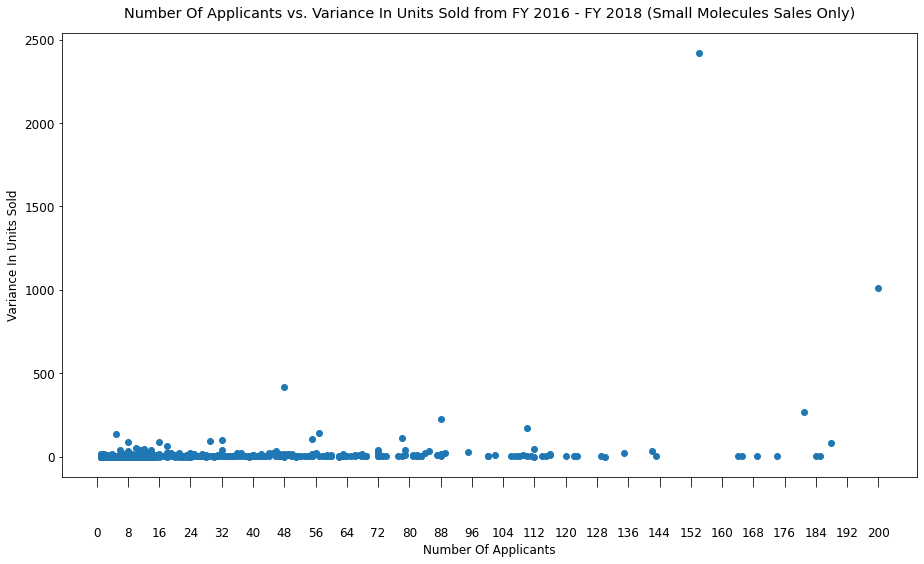

In [831]:
correlation = agg_df['Number Of Applicants'].corr(agg_df['Variance In Units Sold'])
print("Correlation:", correlation)

fig, ax = plt.subplots(figsize=(13, 8))

x_tick_loc = [8*x for x in range(0,26)]
    
ax.scatter(x = agg_df['Number Of Applicants'], y = agg_df['Variance In Units Sold'])
ax.set_xticks(x_tick_loc)
ax.tick_params(axis='x', which='major', pad=40, length=10)
ax.set_xlabel("Number Of Applicants")
ax.set_ylabel("Variance In Units Sold") 
ax.set_title("Number Of Applicants vs. Variance In Units Sold from FY 2016 - FY 2018 (Small Molecules Sales Only)", pad=15)
plt.rc('font', size=12) 
fig.tight_layout()
    
plt.show()